## Applied AI Assesment
## Face Mask Detection using Deep learning

In [1]:
# data set Source below
# https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset

### Import neccesary Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import numpy as np
import cv2
import os
from PIL import Image
from sklearn.model_selection import train_test_split

2023-08-22 20:34:45.607403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# pip install opencv-python
# !pip install Pillow

In [4]:
trainpath = "./Face_Mask_Dataset/"

In [5]:
# retrieved from https://www.tutorialspoint.com/python/os_listdir.htm
# listing out images from their directories
with_mask = os.listdir(f"{trainpath}WithMask/")
without_mask = os.listdir(f"{trainpath}WithoutMask/")

In [6]:
with_mask_len = len(with_mask)
without_mask_len = len(without_mask)

In [7]:
print(f"total images with mask {with_mask_len} \
Total Image Without file {without_mask_len}")

total images with mask 2200 Total Image Without file 2200


In [8]:
without_mask[:2]

['No Mask_202.png', 'No Mask_2107.png']

In [9]:
with_mask[:10]

['Mask_1336.png',
 'Mask_2159.png',
 'Mask_1450.png',
 'Mask_1444.png',
 'Mask_318.png',
 'Mask_1322.png',
 'Mask_330.png',
 'Mask_456.png',
 'Mask_2165.png',
 'Mask_442.png']

In [10]:
# Plot of Image

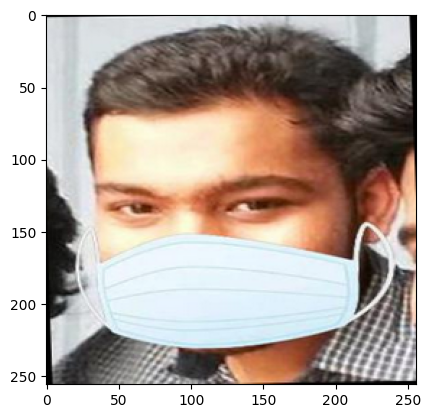

In [11]:
# retrieved from  https://stackoverflow.com/questions/35286540/display-an-image-with-python
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(f"{trainpath}WithMask/Mask_442.png")
imgplot = plt.imshow(img)
plt.show()

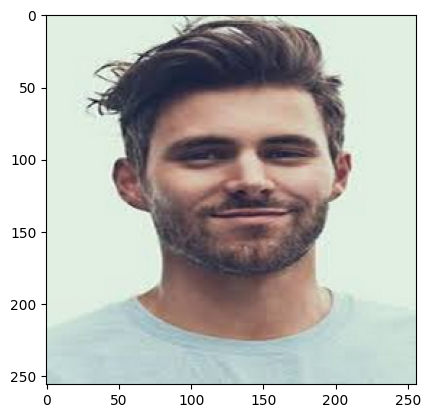

In [12]:
# retrieved from  https://stackoverflow.com/questions/35286540/display-an-image-with-python
img = mpimg.imread(f"{trainpath}WithoutMask/No Mask_2107.png")
imgplot = plt.imshow(img)
plt.show()
# 348.png

In [13]:
# inspired by https://cloudinary.com/guides/bulk-image-resize/python-image-resize-with-pillow-and-opencv
# reshape Images so that they can maintain thesame shape
def resizeImage(imageDir,folderType ="WithMask" ):
    processed_images =[]
    for img in imageDir: # loop through masked images
        image = Image.open(f"{trainpath}{folderType}/{img}") # read Image
        new_image = image.resize((215, 215)) #reshape image to 120
        new_image = new_image.convert("RGB")
        processed_images.append(np.array(new_image)) #store the image to np_images list
    return processed_images

In [14]:
withMaskImages = resizeImage(with_mask)
withoutMaskImages = resizeImage(without_mask,"WithoutMask")

In [15]:
combinedImages = withMaskImages + withoutMaskImages

In [16]:
combinedImages[0]

array([[[183, 177, 151],
        [183, 177, 151],
        [185, 179, 153],
        ...,
        [199, 192, 170],
        [201, 195, 173],
        [199, 193, 171]],

       [[183, 177, 151],
        [185, 179, 153],
        [186, 180, 154],
        ...,
        [200, 193, 170],
        [199, 193, 171],
        [196, 190, 168]],

       [[185, 179, 153],
        [187, 181, 155],
        [188, 182, 156],
        ...,
        [203, 194, 174],
        [197, 191, 169],
        [192, 186, 164]],

       ...,

       [[ 18,  38,  37],
        [ 15,  35,  34],
        [ 12,  32,  31],
        ...,
        [  3,   2,   3],
        [  8,   7,   5],
        [ 17,  16,  14]],

       [[ 17,  37,  36],
        [ 13,  33,  32],
        [ 10,  30,  29],
        ...,
        [  6,   6,   6],
        [  9,   8,   6],
        [ 18,  17,  15]],

       [[ 17,  37,  36],
        [ 13,  33,  32],
        [  8,  28,  27],
        ...,
        [  9,   9,   8],
        [ 11,  10,   7],
        [ 20,  19,  17]]

In [17]:
# # inspired by https://cloudinary.com/guides/bulk-image-resize/python-image-resize-with-pillow-and-opencv
# # reshape Images so that they can maintain thesame shape
# np_images = []
# for img in with_mask: # loop through masked images
#     image = Image.open(f"{trainpath}WithMask/{img}") # read Image
#     new_image = image.resize((128, 128)) #reshape image to 120
#     new_image.convert('RGB')
#     np_images.append(np.array(new_image)) #store the image to np_images list

In [18]:
# # inspired by https://cloudinary.com/guides/bulk-image-resize/python-image-resize-with-pillow-and-opencv
# for img in with_mask: # loop through masked images
#     image = Image.open(f"{trainpath}/WithMask/{img}") # read Image
#     new_image = image.resize((128, 128)) #reshape image to 120
#     new_image.convert('RGB')
#     np_images.append(np.array(new_image)) #store the image to np_images list

In [19]:
# with_mask_path = './Face_Mask_Dataset/Train/WithMask/'

# np_images = []

# for img_file in with_mask:
#     image = Image.open(with_mask_path + img_file)
#     image = image.resize((128,128))
#     image = image.convert('RGB')
#     image = np.array(image)
#     np_images.append(image)



# without_mask_path = './Face_Mask_Dataset/Train/WithoutMask/'


# for img_file in without_mask:

#     image = Image.open(without_mask_path + img_file)
#     image = image.resize((128,128))
#     image = image.convert('RGB')
#     image = np.array(image)
#     np_images.append(image)

### Label Creation for faces with mask and without mask

For this, I will represent image with mask as 1 and without mask as 0

### Labeling Section

In [20]:
# create label for with and without mask
withmask_label = [1 for i in range(with_mask_len)]
withoutmask_label = [0 for i in range(without_mask_len)]

In [21]:
# concat both label for masked and unmasked together
combined_label = withmask_label + withoutmask_label

In [22]:
combinedImages

[array([[[183, 177, 151],
         [183, 177, 151],
         [185, 179, 153],
         ...,
         [199, 192, 170],
         [201, 195, 173],
         [199, 193, 171]],
 
        [[183, 177, 151],
         [185, 179, 153],
         [186, 180, 154],
         ...,
         [200, 193, 170],
         [199, 193, 171],
         [196, 190, 168]],
 
        [[185, 179, 153],
         [187, 181, 155],
         [188, 182, 156],
         ...,
         [203, 194, 174],
         [197, 191, 169],
         [192, 186, 164]],
 
        ...,
 
        [[ 18,  38,  37],
         [ 15,  35,  34],
         [ 12,  32,  31],
         ...,
         [  3,   2,   3],
         [  8,   7,   5],
         [ 17,  16,  14]],
 
        [[ 17,  37,  36],
         [ 13,  33,  32],
         [ 10,  30,  29],
         ...,
         [  6,   6,   6],
         [  9,   8,   6],
         [ 18,  17,  15]],
 
        [[ 17,  37,  36],
         [ 13,  33,  32],
         [  8,  28,  27],
         ...,
         [  9,   9,   8],
  

### Set X and y Variables

In [23]:
# convert all the images to numpy array
X = np.array(combinedImages)
# convert all the labels to numpy array
y = np.array(combined_label)

In [24]:
X

array([[[[183, 177, 151],
         [183, 177, 151],
         [185, 179, 153],
         ...,
         [199, 192, 170],
         [201, 195, 173],
         [199, 193, 171]],

        [[183, 177, 151],
         [185, 179, 153],
         [186, 180, 154],
         ...,
         [200, 193, 170],
         [199, 193, 171],
         [196, 190, 168]],

        [[185, 179, 153],
         [187, 181, 155],
         [188, 182, 156],
         ...,
         [203, 194, 174],
         [197, 191, 169],
         [192, 186, 164]],

        ...,

        [[ 18,  38,  37],
         [ 15,  35,  34],
         [ 12,  32,  31],
         ...,
         [  3,   2,   3],
         [  8,   7,   5],
         [ 17,  16,  14]],

        [[ 17,  37,  36],
         [ 13,  33,  32],
         [ 10,  30,  29],
         ...,
         [  6,   6,   6],
         [  9,   8,   6],
         [ 18,  17,  15]],

        [[ 17,  37,  36],
         [ 13,  33,  32],
         [  8,  28,  27],
         ...,
         [  9,   9,   8],
        

In [25]:
len(X)

4400

In [26]:
type(y)

numpy.ndarray

In [27]:
len(y)

4400

In [28]:
print(X.shape)

(4400, 215, 215, 3)


### Split Data into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
# 80% of the data
X_train.shape

(3520, 215, 215, 3)

In [31]:
# 20% of the data
X_test.shape

(880, 215, 215, 3)

In [32]:
# http://carina.cse.lehigh.edu/Data_Analytics_Course/1.%20Image%20Classification%20using%20Neural%20Network.html
# normalize inputs from 0-255 to 0-1
X_train = X_train/ 255
X_test = X_test/ 255

In [33]:
X_train[0]

array([[[0.10588235, 0.10588235, 0.1372549 ],
        [0.10196078, 0.10196078, 0.13333333],
        [0.09411765, 0.09411765, 0.1254902 ],
        ...,
        [0.20392157, 0.20392157, 0.20784314],
        [0.21960784, 0.21960784, 0.22745098],
        [0.23529412, 0.23529412, 0.24313725]],

       [[0.11372549, 0.11372549, 0.14509804],
        [0.11372549, 0.11372549, 0.14509804],
        [0.10588235, 0.10980392, 0.1372549 ],
        ...,
        [0.20392157, 0.2       , 0.20784314],
        [0.21176471, 0.21176471, 0.21960784],
        [0.22745098, 0.22745098, 0.23529412]],

       [[0.11764706, 0.11764706, 0.14901961],
        [0.11764706, 0.11764706, 0.14901961],
        [0.12156863, 0.12156863, 0.15294118],
        ...,
        [0.21176471, 0.20784314, 0.21960784],
        [0.21176471, 0.21176471, 0.21960784],
        [0.22352941, 0.22352941, 0.23137255]],

       ...,

       [[0.65098039, 0.72941176, 0.76470588],
        [0.57647059, 0.65882353, 0.69019608],
        [0.43529412, 0

In [34]:
# performing data augmentation on image dataset with rotation 20 
# train_datagen = ImageDataGenerator(
#     rotation_range=20, # Randomly rotate images up to 10 degrees
#     width_shift_range=0.1, # Randomly shift images horizontally up to 10% of the width
#     height_shift_range=0.1, # Randomly shift images vertically up to 10% of the height
#     horizontal_flip=True, # Randomly flip images horizontally
#     vertical_flip=False, # Don't randomly flip images vertically
#     shear_range=0.10, # crops part of the image
#     zoom_range=0.10 # #zooms the image by 10%
# )

In [35]:
# Fit the transformation to the training dataset
# train_datagen.fit(X_train)

In [36]:
# showing sample of a transformation
# plt.imshow(train_datagen.random_transform(X_train[1]))

### Building Cnn Model Using keras and tesorflow

Using 2 convolutional layers

In [43]:
# referenced from my understanding AI lab work
model = Sequential()
# first convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(215,215,3),activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # # Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # # fourth layer
# model.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.5))


# model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))

# # Dense layer
model.add(Dense(64,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.5))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model.add(Dense(2,activation = 'sigmoid'))

In [44]:
# print the summary of the model constructed
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 215, 215, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 107, 107, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 105, 105, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 52, 52, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 128)     

In [45]:
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [46]:
len(X_train)

3520

In [47]:
len(X_test)

880

In [48]:
# history = model.fit(
#     train_datagen.flow(X_train, y_train, batch_size=32),
#     epochs=5,
#     validation_split=0.2,
#     validation_data=(X_test, y_test)
# )
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
88/88 [==============================] - 206s 2s/step - loss: 0.5569 - acc: 0.7326 - val_loss: 0.3260 - val_acc: 0.8565
Epoch 2/5
88/88 [==============================] - 154s 2s/step - loss: 0.2983 - acc: 0.8789 - val_loss: 0.2687 - val_acc: 0.8807
Epoch 3/5
88/88 [==============================] - 145s 2s/step - loss: 0.2792 - acc: 0.8842 - val_loss: 0.2318 - val_acc: 0.8963
Epoch 4/5
88/88 [==============================] - 145s 2s/step - loss: 0.2606 - acc: 0.8974 - val_loss: 0.2389 - val_acc: 0.8991
Epoch 5/5
88/88 [==============================] - 149s 2s/step - loss: 0.2173 - acc: 0.9141 - val_loss: 0.2566 - val_acc: 0.9048


In [ ]:
# history = model.fit(
#     X_train,
#     y_train,
#     validation_split=0.1,
#     epochs=10,
# )

In [49]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.174381822347641
Test accuracy: 0.9284090995788574


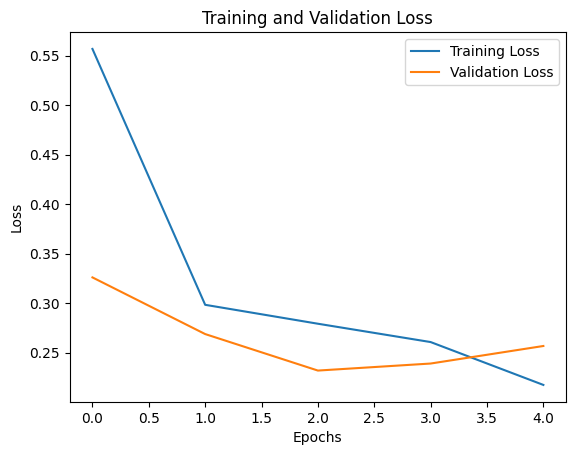

In [50]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

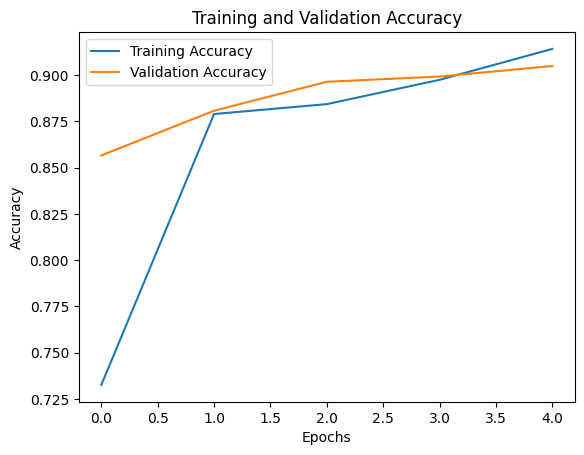

In [51]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['acc'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_acc'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

### Cases of Overfitting were discovered at some points
I have added another Convolutional block to make it 4 layers to compare the performance

In [52]:
from keras import regularizers


In [56]:
# referenced from my understanding AI lab work
model = Sequential()
# first convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(215,215,3),activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # # Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # # fourth layer
model.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.2))


model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))

# # Dense layer
model.add(Dense(64,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.2))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model.add(Dense(2,activation = 'sigmoid'))

In [57]:
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [58]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
88/88 [==============================] - 266s 3s/step - loss: 0.9763 - acc: 0.7773 - val_loss: 0.5808 - val_acc: 0.8736
Epoch 2/5
88/88 [==============================] - 190s 2s/step - loss: 0.4974 - acc: 0.8842 - val_loss: 0.3914 - val_acc: 0.8935
Epoch 3/5
88/88 [==============================] - 185s 2s/step - loss: 0.3428 - acc: 0.9041 - val_loss: 0.3059 - val_acc: 0.8892
Epoch 4/5
88/88 [==============================] - 168s 2s/step - loss: 0.2744 - acc: 0.9208 - val_loss: 0.3247 - val_acc: 0.8736
Epoch 5/5
88/88 [==============================] - 170s 2s/step - loss: 0.2387 - acc: 0.9293 - val_loss: 0.2406 - val_acc: 0.9247


In [192]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.17776869237422943
Test accuracy: 0.9431818127632141


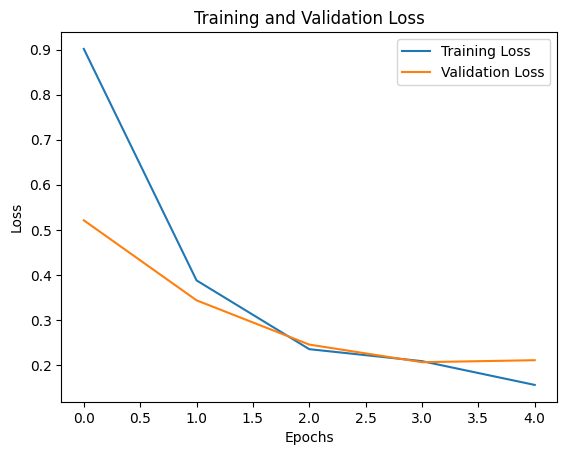

In [193]:
## checking for overfitting
# Plot training loss against validation loss
#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')
#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')
#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

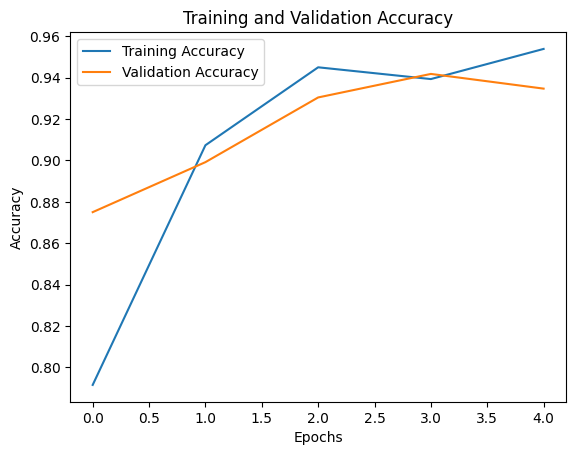

In [194]:
# Plot training and validation accuracy
#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['acc'], label='Training Accuracy')
#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_acc'], label='Validation Accuracy')
#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')
#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')
#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')
#Shows the legend of the plot with the labels of the two lines.
plt.legend()
#Shows the plot on the screen.
plt.show()

In [ ]:
# optimizer = SGD(learning_rate=0.001, momentum=0.9)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# current1

In [59]:
# referenced from my understanding AI lab work
model = Sequential()
# first convolutional layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(215,215,3),activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional layer
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # # Third layer
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# # # fourth layer
model.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten layer
model.add(Flatten())

# Dense layer
model.add(Dense(128,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.2))


model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))

# # Dense layer
model.add(Dense(64,activation = 'relu'))
# in case of overfitting
model.add(Dropout(0.2))

# number of the neuron has to be the number of class
# in my case, i have 2 classes (masked and unmasked)
# here also, i am using sigmoid because i am dealing with binary problem
model.add(Dense(2,activation = 'sigmoid'))

In [60]:
from keras.callbacks import EarlyStopping

In [61]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [63]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5,callbacks=[early_stopping])

Epoch 1/5
88/88 [==============================] - 196s 2s/step - loss: 0.9375 - acc: 0.8164 - val_loss: 0.5842 - val_acc: 0.8878
Epoch 2/5
88/88 [==============================] - 166s 2s/step - loss: 0.4691 - acc: 0.9045 - val_loss: 0.3790 - val_acc: 0.9176
Epoch 3/5
88/88 [==============================] - 167s 2s/step - loss: 0.3210 - acc: 0.9208 - val_loss: 0.2900 - val_acc: 0.9290
Epoch 4/5
88/88 [==============================] - 167s 2s/step - loss: 0.2441 - acc: 0.9411 - val_loss: 0.3000 - val_acc: 0.8963
Epoch 5/5
88/88 [==============================] - 160s 2s/step - loss: 0.2058 - acc: 0.9478 - val_loss: 0.2388 - val_acc: 0.9332
